<center> <h1 Style="color:#455da5">Proyecto Machine Learning BANCO UNO</h1> </center>
</br>
<p Style="text-align: justify">Esta investigación se centró en el caso de los pagos por defecto de los clientes de Banco Uno y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos.

De la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la estimación La probabilidad de incumplimiento será más valiosa que el resultado binario de la clasificación de Clientes creíbles o no creíbles.

Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presentó el novedoso método de clasificación de suavizado para estimar la probabilidad real de defecto. Con la probabilidad real de incumplimiento como variable de respuesta (Y), y la probabilidad predictiva de incumplimiento como la variable independiente (X), la simple lineal El resultado de la regresión (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercano a cero y coeficiente de regresión (B) a uno. Por lo tanto, entre los seis datos de minería técnicas, la red neuronal artificial es la única que puede estimar con precisión el valor real probabilidad de incumplimiento.</p>
    
</br>

<h2 Style = "color:#566981">1. Cargar y estandarizar los set de datos</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Importar las librerias de Python necesarias</li>
     <li>Importar el o los set de datos</li>
    <li>Ajustar nombre del Set</li>
    <li>Si solo si tenemos mas de 1 set de datos, los vamos a unir en uno solo</li>
</ol>   
<h3 Style = "color:#810907">1.1 Importar las librerias de Python necesarias</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import pymysql
import warnings
warnings.filterwarnings("ignore")
import pandas_profiling
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
mpl.rcParams["axes.spines.bottom"]= True
mpl.rcParams["axes.spines.left"]= False
mpl.rcParams["axes.spines.right"]= False
mpl.rcParams["axes.spines.top"]= False

<h3 Style = "color:#810907">1.2 Importar el o los set de datos</h3>

In [3]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com',
user='deepAnalytics',
password='Sqltask1234!',
database='Credit',
charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)
df = pd.read_sql('SELECT * FROM credit', con = connection )
df. to_csv ( 'BancoUno.csv' , header = False , index = False )

<h3 Style = "color:#810907">1.3 Ajustar nombre del Set</h3>

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [5]:
credit = df

<h3 Style = "color:#810907">1.4 Si solo si tenemos mas de 1 set de datos, los vamos a unir en uno solo</h3>
</br>
<p Style="text-align: justify"> Únicamente contamos con una sola base de datos, por lo que no aplica.</p>
    
</br>

<h2 Style = "color:#566981">2. Analisis de los datos con Pandasprofilling</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Analisis rapido de los datos</li>
    
</ol>   
<h3 Style = "color:#810907">2.1 Aplicar pandasprofilling y analizar los datos</h3>

In [6]:
pandas_profiling.ProfileReport(credit)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2 Style = "color:#566981">3. Preparación de los datos</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Eliminar variables duplicadas</li>
    <li>Cambiar el nombre de las columnas</li>
    <li>Normalizar las variables</li>
        
</ol>   
<h3 Style = "color:#810907">3.1 Eliminar variables duplicadas</h3>

In [7]:
credit.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
credit.shape

(2397, 24)

<h3 Style = "color:#810907">3.2 Cambiar el nombre de las columnas</h3>

In [8]:
credit.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
2,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
3,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
4,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default


In [9]:
encabezado = credit.loc[credit['X1'] == 'LIMIT_BAL']
df_list = encabezado.to_numpy().tolist()
print(df_list)

[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]


In [10]:
credit = credit.rename(columns={'X1':'LIMIT_BAL', 'X2':'SEX', 'X3':'EDUCATION', 'X4':'MARRIAGE',
                                'X5':'AGE', 'X6':'PAY_0', 'X7':'PAY_2', 'X8':'PAY_3', 'X9':'PAY_4',
                                'X10':'PAY_5', 'X11':'PAY_6','X12':'BILL_AMT1', 'X13':'BILL_AMT2',
                                'X14':'BILL_AMT3', 'X15':'BILL_AMT4', 'X16':'BILL_AMT5', 'X17':'BILL_AMT6',
                                'X18':'PAY_AMT1', 'X19':'PAY_AMT2', 'X20':'PAY_AMT3', 'X21':'PAY_AMT4',
                                'X22':'PAY_AMT5', 'X23':'PAY_AMT6', 'Y':'default payment next month (Y)'})

credit.drop([0], axis=0, inplace=True)
credit.reset_index(inplace=True, drop=False)
credit.head(5)

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [11]:
credit.drop(['index'], axis=1,inplace=True)
credit.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month (Y)
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


<h3 Style = "color:#810907">3.3 Normalizacion de variables</h3>
</br>

In [12]:
credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
        'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
        'PAY_AMT5', 'PAY_AMT6']] = credit[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 
        'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
        'PAY_AMT5', 'PAY_AMT6']].astype("int")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   LIMIT_BAL                       2396 non-null   int64 
 1   SEX                             2396 non-null   object
 2   EDUCATION                       2396 non-null   object
 3   MARRIAGE                        2396 non-null   object
 4   AGE                             2396 non-null   int64 
 5   PAY_0                           2396 non-null   int64 
 6   PAY_2                           2396 non-null   int64 
 7   PAY_3                           2396 non-null   int64 
 8   PAY_4                           2396 non-null   int64 
 9   PAY_5                           2396 non-null   int64 
 10  PAY_6                           2396 non-null   int64 
 11  BILL_AMT1                       2396 non-null   int64 
 12  BILL_AMT2                       2396 non-null   

In [13]:
#Cantidad de hombres y mujeres
#Se agrupan y cuenta la cantidad de registros según marca.
dfGraf = credit.groupby(['MARRIAGE']).count()
#Se selecciona únicamente el indice y la primera columna.
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor.
dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)
#Se muestra el dataframe para graficar.
dfGraf

,LIMIT_BAL
MARRIAGE,
2,1330
1,1027
3,33
0,6


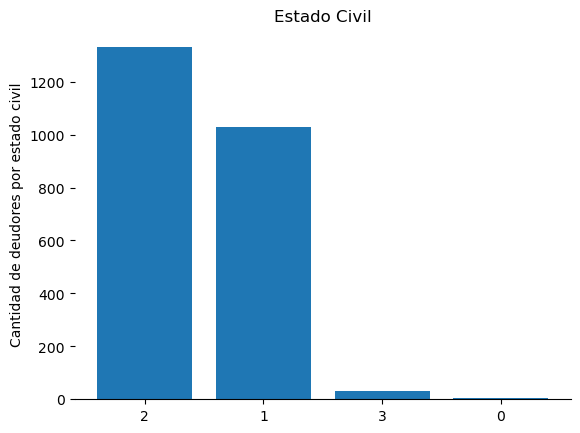

In [14]:
%matplotlib inline
fig, ax = plt.subplots()
eje_x = dfGraf.index.tolist()
eje_y = dfGraf['LIMIT_BAL'].tolist()

ax.bar(eje_x, eje_y)

ax.set_ylabel('Cantidad de deudores por estado civil')
ax.set_title('Estado Civil')
plt.show()

In [15]:
bins = np.linspace(min(credit["AGE"]), max(credit["AGE"]), 12)
bins

array([21.        , 25.90909091, 30.81818182, 35.72727273, 40.63636364,
       45.54545455, 50.45454545, 55.36363636, 60.27272727, 65.18181818,
       70.09090909, 75.        ])

In [16]:
groupNames = ["21-25", "25-30", "30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70","70-75"]
credit['AGE_BINS'] = pd.cut(credit["AGE"], bins, labels=groupNames, include_lowest = True)

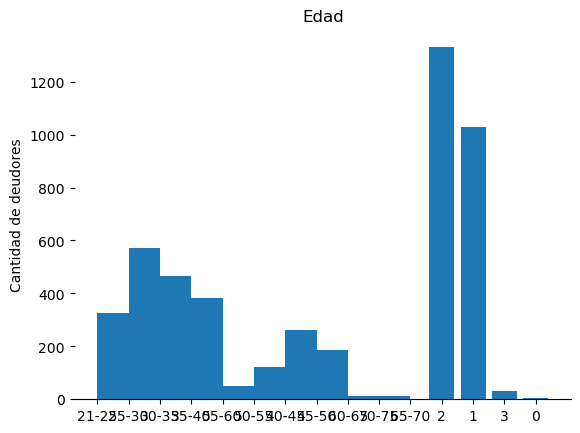

In [17]:
fig, ax = plt.subplots()
plt.hist(credit["AGE_BINS"])

ax.bar(eje_x, eje_y)
ax.set_ylabel('Cantidad de deudores')
ax.set_title('Edad')
plt.show()

In [18]:
#Cantidad de hombres y mujeres
#Se agrupan y cuenta la cantidad de registros según marca.
dfGraf = credit.groupby(['SEX']).count()
#Se selecciona únicamente el indice y la primera columna.
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor.
dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)
#Se muestra el dataframe para graficar.
dfGraf

,LIMIT_BAL
SEX,
female,1384
male,1012


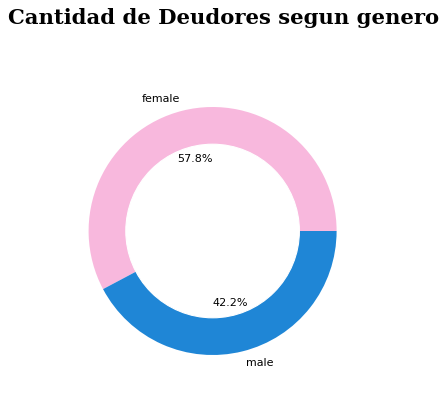

In [19]:
names = dfGraf.index.tolist()
style = dfGraf['LIMIT_BAL'].tolist()


fig, ax = plt.subplots(1, 1, figsize= (5,6.9), dpi=80)

circulo = plt.Circle((0,0), 0.7, color = "white") 
                     
plt.pie(style,
        labels = names, 
        autopct = '%1.1f%%', 
        colors = ['#f8b8dd', '#1f86d6' ])

#Formato del gráfico
#-------Título y Subtítulo del gráfico
title_t = "Cantidad de Deudores segun genero"
ax.set_title(title_t, #mensaje del título
            loc = 'left', #Se define posición del texto al lado izquierdo
            x = 0.001,
            y = 0.78,
            transform = fig.transFigure,
            fontsize = 19,
            fontweight = "bold",
            fontfamily = "serif")


plt.subplots_adjust(top = 0.70)

p = plt.gcf()
p.gca().add_artist(circulo)
plt.show()

In [20]:

#Se agrupan y cuenta la cantidad de registros según marca.
dfGraf = credit.groupby(['EDUCATION']).count()
#Se selecciona únicamente el indice y la primera columna.
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor.
dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)
#Se muestra el dataframe para graficar.
dfGraf

,LIMIT_BAL
EDUCATION,
university,1077
graduate school,909
high school,392
other,18


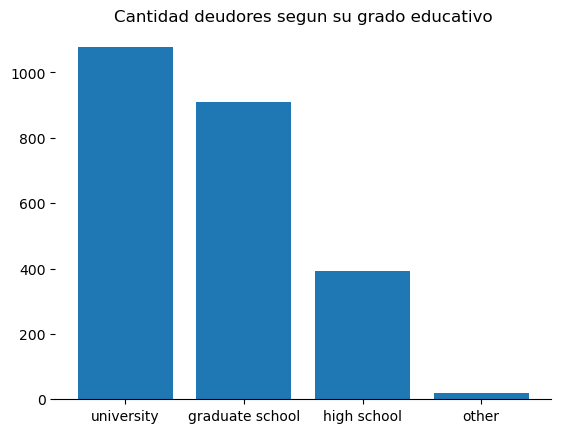

In [21]:
fig, ax = plt.subplots()
eje_x = dfGraf.index.tolist()
eje_y = dfGraf['LIMIT_BAL'].tolist()

ax.bar(eje_x, eje_y)

ax.set_title('Cantidad deudores segun su grado educativo')
plt.show()

In [22]:
#Se agrupan y cuenta la cantidad de registros según marca.
dfGraf = credit.groupby(['AGE']).sum()
#Se selecciona únicamente el indice y la primera columna.
dfGraf = dfGraf.iloc[:,:1]
#Se ordenan los datos de mayor a menor.
dfGraf = dfGraf.sort_values('LIMIT_BAL', ascending = False)


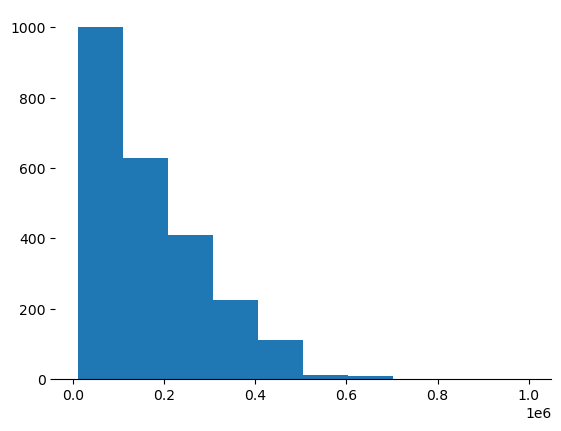

In [23]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

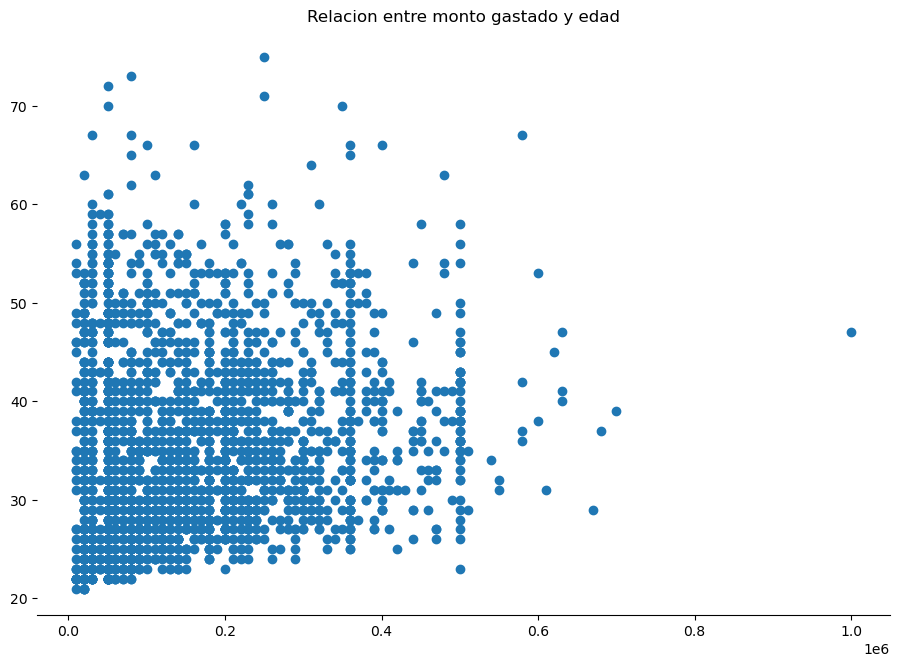

In [24]:


fig, ax = plt.subplots(1, 1, figsize= (11,7.6), dpi=100)

ax.set_title('Relacion entre monto gastado y edad')

x = credit['LIMIT_BAL']

y = credit['AGE']

plt.scatter(x,y)
plt.show()

<AxesSubplot:>

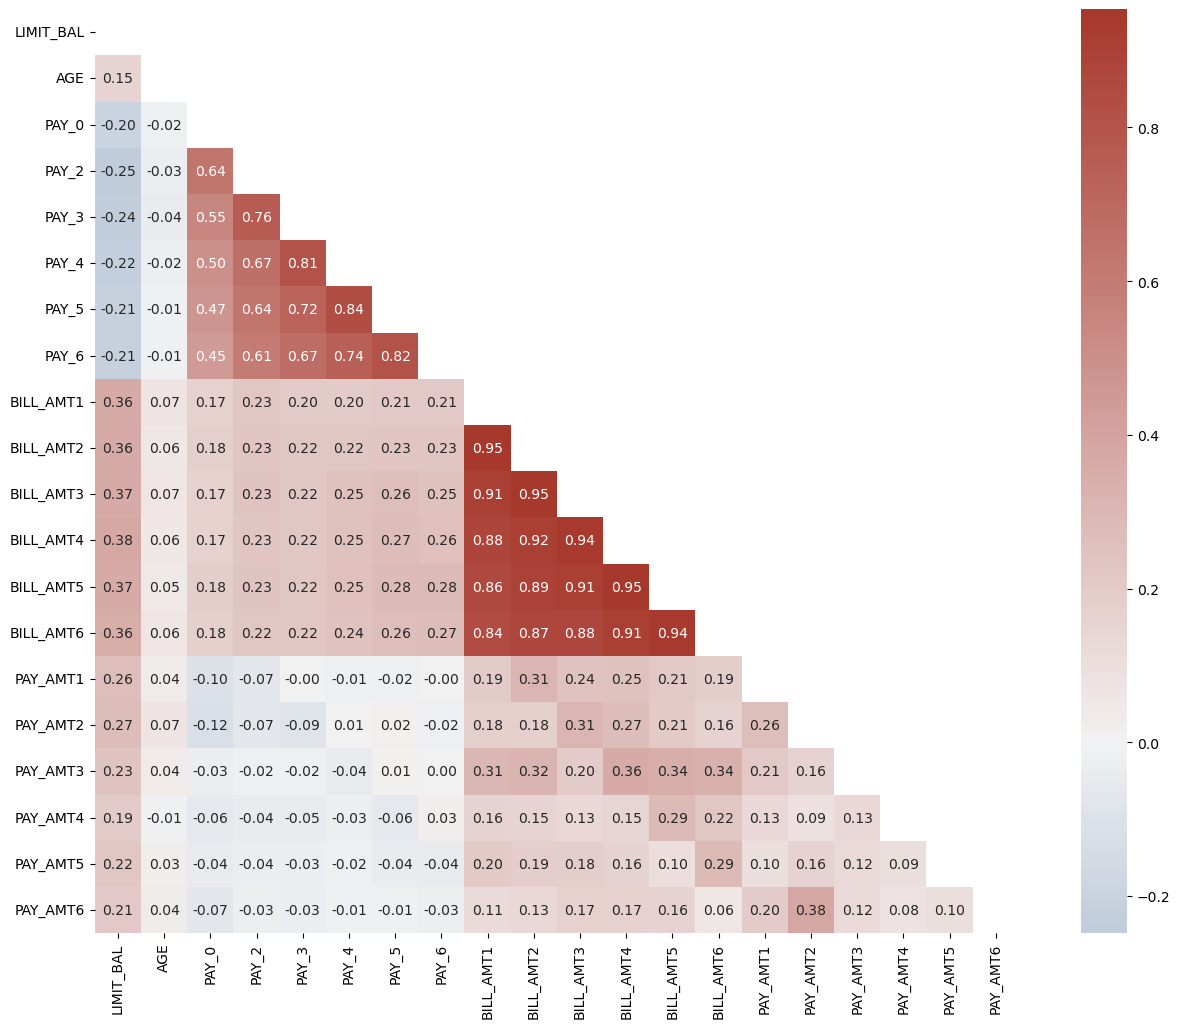

In [25]:
matrix = credit.corr()

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

plt.figure(figsize=(16,12))

mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap=cmap)

<h2 Style = "color:#566981">4. Aplicacion de PCA</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Separar las características (X) de la variable objetivo</li>
    <li>Estandarizar los datos</li>
    <li>Crear una instancia de PCA</li>
    <li>Crear un nuevo DataFrame con las componentes principales resultantes</li>
        
</ol>   
<h3 Style = "color:#810907">4.1 Separar las características (X) de la variable objetivo</h3>

In [26]:
X = credit.loc[: , ["LIMIT_BAL", "AGE", "PAY_0", "PAY_2", "PAY_3", 
        "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", 
        "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", 
        "PAY_AMT5", "PAY_AMT6"]]
Y = credit.loc[:, ["default payment next month (Y)"]]

<h3 Style = "color:#810907">4.2 Estandarizar los datos</h3>

In [38]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

<h3 Style = "color:#810907">4.3 Crear una instancia de PCA</h3>

In [40]:
n_components = 2  # Número de componentes principales que deseas obtener
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)


<h3 Style = "color:#810907">4.4 Crear un nuevo DataFrame con las componentes principales resultantes</h3>

In [41]:
pca_credit = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_credit.head()

,PC1,PC2
0,-1.870263,-0.761348
1,-0.767829,-2.018316
2,-0.832976,-0.968938
3,-0.222358,-0.818195
4,-0.713466,0.111313


In [43]:
credit_final = pd.concat([pca_credit, credit[['default payment next month (Y)']]], axis = 1)


In [44]:
credit_final.head(10)

,PC1,PC2,default payment next month (Y)
0,-1.870263,-0.761348,default
1,-0.767829,-2.018316,default
2,-0.832976,-0.968938,not default
3,-0.222358,-0.818195,not default
4,-0.713466,0.111313,not default
5,-0.213885,-0.812272,not default
6,13.819346,6.281682,not default
7,-1.785746,-0.355013,not default
8,-0.697270,-1.563635,not default
9,-2.741158,1.646878,not default


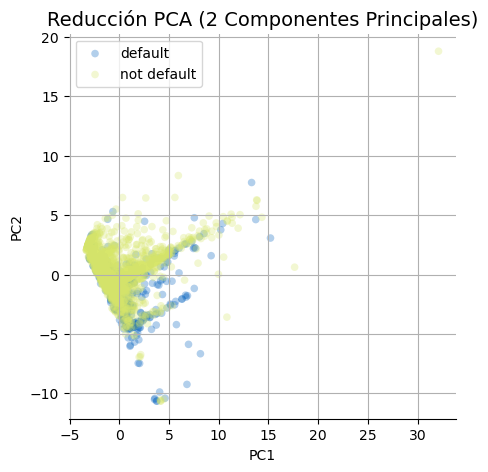

In [49]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('Reducción PCA (2 Componentes Principales)', fontsize = 14)

targets = ['default', 'not default']
colors = ['#0060be','#d7e66a']

for target, color in zip(targets,colors):
    indicesToKeep = credit_final['default payment next month (Y)'] == target
    ax.scatter(credit_final.loc[indicesToKeep, 'PC1']
               , credit_final.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 30
               ,alpha=0.3
               ,edgecolors='none')
ax.legend(targets)
ax.grid()

In [50]:
pca.explained_variance_ratio_

array([0.3357123 , 0.20397228])

<h2 Style = "color:#566981">5. Implementacion del modelo de regresion lineal</h2>
</br>
<p>Que se hace en esta etapa?</p>
</br>
<ol>
    <li>Visualizacion de los datos nuevos del PCA</li>
    <li>Aplicacion del modelo</li>
        
</ol>   
<h3 Style = "color:#810907">5.1 Visualizacion de los datos nuevos del PCA</h3>

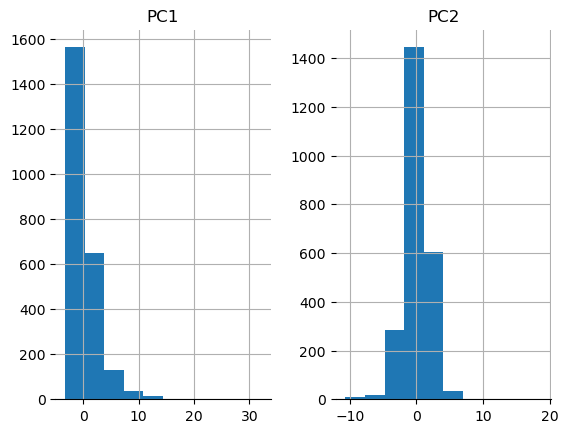

In [51]:
viz = credit_final[['PC1','PC2','default payment next month (Y)']]
viz.hist()
plt.show()

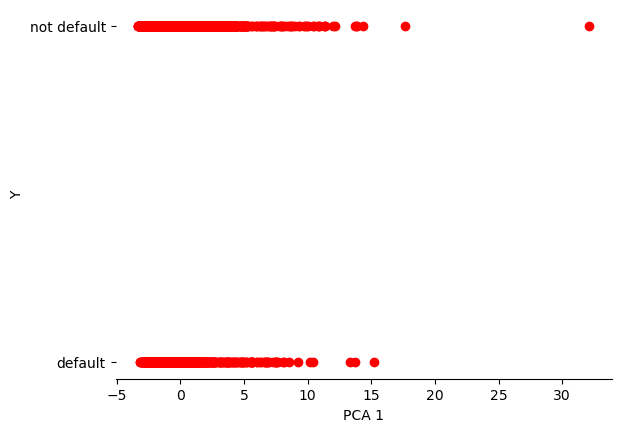

In [58]:
credit_final = credit_final.rename(columns={'default payment next month (Y)':'Y'})

plt.scatter(credit_final.PC1, credit_final.Y,  color='red')
plt.xlabel("PCA 1")
plt.ylabel("Y")
plt.show()

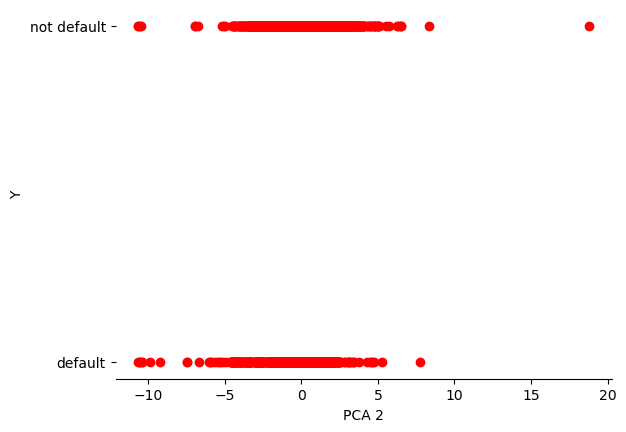

In [60]:
plt.scatter(credit_final.PC2, credit_final.Y,  color='red')
plt.xlabel("PCA 2")
plt.ylabel("Y")
plt.show()

<h3 Style = "color:#810907">5.2 Aplicacion del modelo</h3>
</br>
<p>No se puede aplicar el modelo, debido a que no es viable</p>
</br>